### imputeTS: [Time Series Missing Value Imputation in R](https://cran.r-project.org/web/packages/imputeTS/vignettes/imputeTS-Time-Series-Missing-Value-Imputation-in-R.pdf)

In [152]:
library(ggplot2)
library(dplyr)
library(imputeTS)
library(data.table)
library(forecast)

In [153]:
df_us = read.csv(file="hts_us_ind.csv", header=TRUE, sep=",")

In [154]:
df_us = as.data.table(df_us)

In [155]:
rownames(df_us) = as.Date(df_us$date)
#rownames(data)
df_us$date <- NULL
#colnames(data)

In [156]:
df_us$MEAGR  <- na.ma(df_us$MEMIN, weighting = "exponential", k = 4)
df_us$MEMIN  <- na.ma(df_us$MEMIN, weighting = "exponential", k = 4)

In [157]:
df_us$DECON  <- na.ma(df_us$MEMIN, weighting = "exponential", k = 4) 

In [158]:
df_us$DEMIN[41:54]  <- rep(0,14)
df_us$DEMIN  <- na.ma(df_us$DEMIN, weighting = "exponential", k = 8)

In [159]:
df_us$RIMIN[41:54]  <- rep(0,14)
df_us$RIAGR[41:54]  <- rep(0,14)
df_us$RIMIN  <- na.ma(df_us$DEMIN, weighting = "exponential", k = 8)
df_us$RIAGR  <- na.ma(df_us$DEMIN, weighting = "exponential", k = 8)

In [160]:
df_us$DEAGR[21:54]  <- rep(0,34)
df_us$DEAGR  <- na.kalman(df_us$DEAGR, model =  "StructTS", nit = -1)

In [161]:
df_us$RICON  <- na.ma(df_us$RICON, weighting = "exponential", k = 8)
df_us$WYAGR  <- na.ma(df_us$WYAGR, weighting = "exponential", k = 8)
df_us$WYNDU  <- na.ma(df_us$WYNDU, weighting = "exponential", k = 4)
df_us$WYDUR  <- na.ma(df_us$WYDUR, weighting = "exponential", k = 4)

In [162]:
df_us %>% 
  select_if(function(x) any(is.na(x))) 

<0 x 0 matrix>

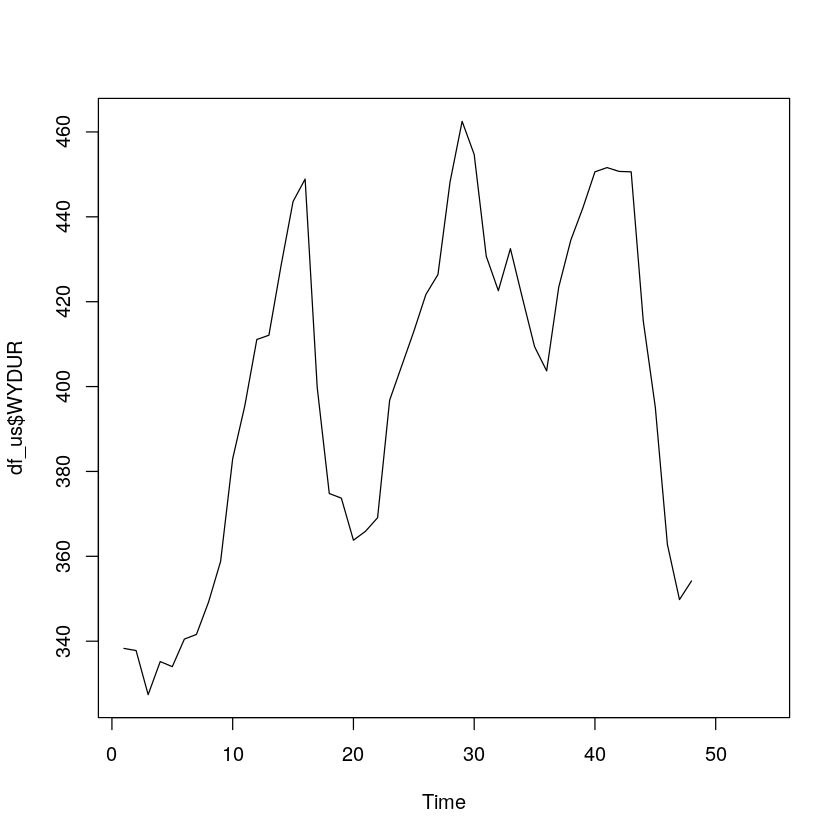

In [144]:
ts.plot(df_us$WYDUR)

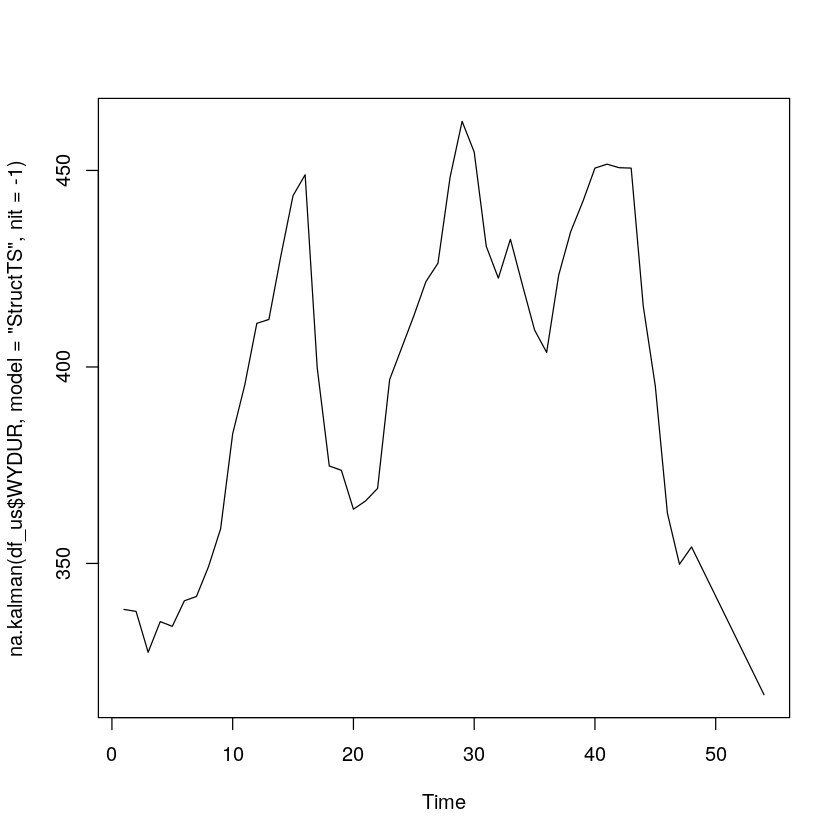

In [145]:
ts.plot(na.kalman(df_us$WYDUR, model =  "StructTS", nit = -1))

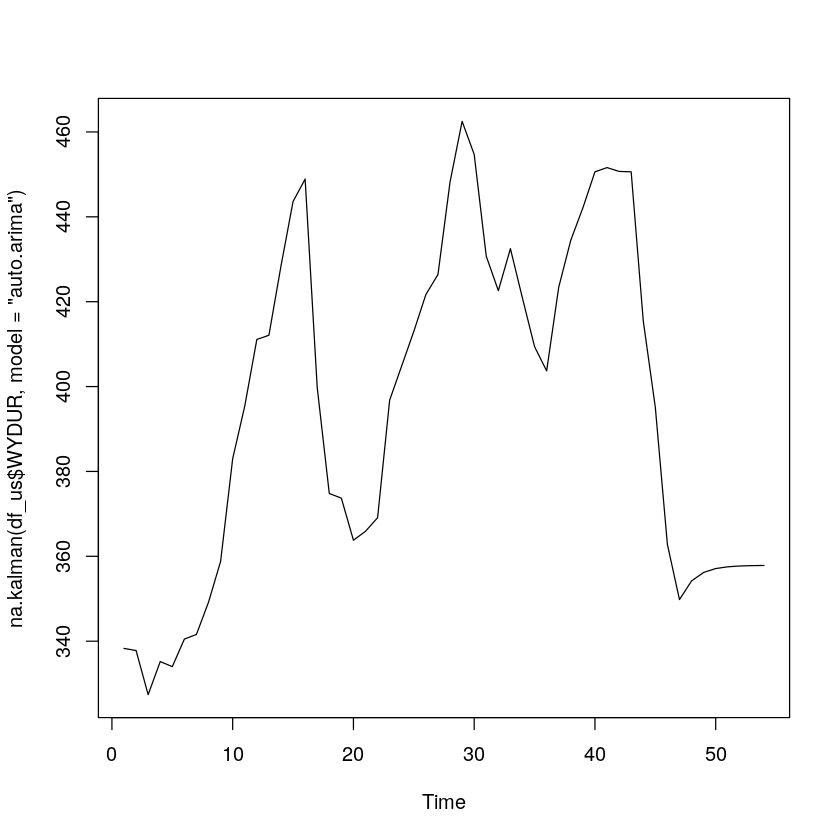

In [146]:
ts.plot(na.kalman(df_us$WYDUR, model =  "auto.arima"))

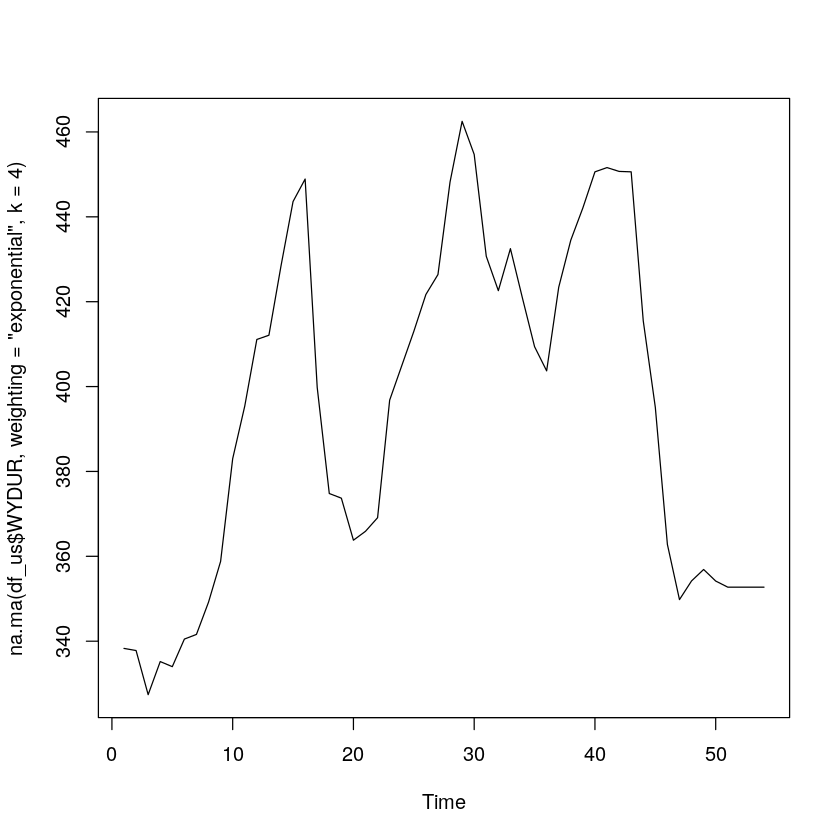

In [149]:
ts.plot(na.ma(df_us$WYDUR, weighting = "exponential", k = 4)) 

In [164]:
write.csv(df_us, file="hts_us_ind_filled.csv")